In [35]:
import sklearn, pandas as pd, numpy as np, matplotlib, seaborn as sns

In [36]:
import imblearn   

Imblearn techniques are the methods by which we can generate a data set that has an equal ratio of classes. The predictive model built on this type of data set would be able to generalize well. We mainly have two options to treat an imbalanced data set that are Upsampling and Downsampling.
It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

Imbalanced data refers to a dataset within which one or some of the classes have a much greater number of examples than the others.

In [37]:
import shap

In [38]:
import tqdm

In [39]:
rand_seed = 42

In [40]:
enzyme_gene = pd.read_csv("enzyme_gene.csv", index_col=0)   #'Gene' column is read in as index

In [41]:
features = enzyme_gene.columns[1:]     #get all feature names

In [42]:
features

Index(['Func_likelihood', 'Fam_size', 'Max_id_paralog', 'WGD_alpha',
       'WGD_beta_gamma', 'Dup_recent', 'Dup_tandem', 'Singleton',
       'Max_PCC_GM_abiotic', 'Max_PCC_SM_abiotic', 'Max_PCC_GM_biotic',
       'Max_PCC_SM_biotic', 'Max_PCC_GM_hormone', 'Max_PCC_SM_hormone',
       'Expr_med_dev', 'Expr_max_dev', 'Expr_breadth_dev'],
      dtype='object')

In [43]:
features = enzyme_gene.columns[0:]
features

Index(['Label', 'Func_likelihood', 'Fam_size', 'Max_id_paralog', 'WGD_alpha',
       'WGD_beta_gamma', 'Dup_recent', 'Dup_tandem', 'Singleton',
       'Max_PCC_GM_abiotic', 'Max_PCC_SM_abiotic', 'Max_PCC_GM_biotic',
       'Max_PCC_SM_biotic', 'Max_PCC_GM_hormone', 'Max_PCC_SM_hormone',
       'Expr_med_dev', 'Expr_max_dev', 'Expr_breadth_dev'],
      dtype='object')

In [44]:
enzyme_gene.sample(4)   #printout 4 randomly sampled instances

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT1G44446,GM,0.999,4.0,29.31,1.0,0.0,0.0,0.0,0.0,0.811,0.796,0.893,0.815,0.922,0.876,527.240133,2596.634067,61.0
NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT2G41700,GM,0.990,14.0,45.77,0.0,0.0,0.0,0.0,0.0,0.805,0.824,0.852,0.784,0.745,0.823,173.194053,577.512640,64.0
AT1G21120,SM,0.150,17.0,97.86,0.0,0.0,1.0,1.0,0.0,0.863,0.981,0.812,0.967,0.776,0.661,53.147587,1074.500940,53.0


In [45]:
enzyme_gene.head(3)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0


In [46]:
enzyme_gene.tail(3)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
enzyme_gene.shape  #to check no of rows and columns

(5238, 18)

In [48]:
enzyme_gene.describe()  #description of data from dataset

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,3550.000000,4152.000000,3899.000000,4769.000000,4769.000000,4501.000000,4512.000000,4240.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4150.000000,4150.000000,4150.000000
mean,0.804897,29.770472,66.566127,0.279094,0.122667,0.049767,0.270612,0.051651,0.789531,0.725130,0.848149,0.793080,0.815422,0.746845,428.028998,2191.368616,44.368675
std,0.254692,41.524700,18.041234,0.448601,0.328089,0.217487,0.444325,0.221347,0.090319,0.106227,0.079397,0.099534,0.082482,0.104096,1042.343895,3327.095677,24.428359
min,0.000000,1.000000,19.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424000,0.322000,0.531000,0.445000,0.486000,0.412000,3.233606,5.763663,0.000000
25%,0.690750,4.000000,54.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.731000,0.655000,0.800000,0.728000,0.762000,0.673000,14.464360,326.100708,17.000000
50%,0.940000,11.000000,70.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.737000,0.857000,0.804000,0.822000,0.748000,117.897502,982.311288,60.000000
75%,0.990000,34.000000,80.420000,1.000000,0.000000,0.000000,1.000000,0.000000,0.857000,0.806000,0.908000,0.871000,0.878000,0.824250,400.282721,2564.031166,64.000000
max,1.000000,293.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.982000,0.982000,0.992000,0.983000,0.987000,0.978000,20115.064720,30288.301360,64.000000


In [49]:
enzyme_gene.nunique()   #gives unique values in 

Label                    3
Func_likelihood        538
Fam_size                56
Max_id_paralog        2525
WGD_alpha                2
WGD_beta_gamma           2
Dup_recent               2
Dup_tandem               2
Singleton                2
Max_PCC_GM_abiotic     429
Max_PCC_SM_abiotic     503
Max_PCC_GM_biotic      383
Max_PCC_SM_biotic      450
Max_PCC_GM_hormone     397
Max_PCC_SM_hormone     487
Expr_med_dev          4150
Expr_max_dev          4149
Expr_breadth_dev        65
dtype: int64

In [50]:
enzyme_gene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5238 entries, AT2G20690 to nan
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Label               4913 non-null   object 
 1   Func_likelihood     3550 non-null   float64
 2   Fam_size            4152 non-null   float64
 3   Max_id_paralog      3899 non-null   float64
 4   WGD_alpha           4769 non-null   float64
 5   WGD_beta_gamma      4769 non-null   float64
 6   Dup_recent          4501 non-null   float64
 7   Dup_tandem          4512 non-null   float64
 8   Singleton           4240 non-null   float64
 9   Max_PCC_GM_abiotic  4152 non-null   float64
 10  Max_PCC_SM_abiotic  4152 non-null   float64
 11  Max_PCC_GM_biotic   4152 non-null   float64
 12  Max_PCC_SM_biotic   4152 non-null   float64
 13  Max_PCC_GM_hormone  4152 non-null   float64
 14  Max_PCC_SM_hormone  4152 non-null   float64
 15  Expr_med_dev        4150 non-null   float64
 16  Expr

In [51]:
enzyme_gene['Label'].value_counts()  #The function returns the count of all unique values in the given index in descending order, without any null values.

unknown    2291
GM         2212
SM          410
Name: Label, dtype: int64

In [52]:
enzyme_gene.isnull().sum()

Label                  325
Func_likelihood       1688
Fam_size              1086
Max_id_paralog        1339
WGD_alpha              469
WGD_beta_gamma         469
Dup_recent             737
Dup_tandem             726
Singleton              998
Max_PCC_GM_abiotic    1086
Max_PCC_SM_abiotic    1086
Max_PCC_GM_biotic     1086
Max_PCC_SM_biotic     1086
Max_PCC_GM_hormone    1086
Max_PCC_SM_hormone    1086
Expr_med_dev          1088
Expr_max_dev          1088
Expr_breadth_dev      1088
dtype: int64

In [53]:
import matplotlib.pyplot as plt, seaborn as sns

In [54]:
feature_values = enzyme_gene.iloc[:, 1:]
feature_values

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,
AT2G20690,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


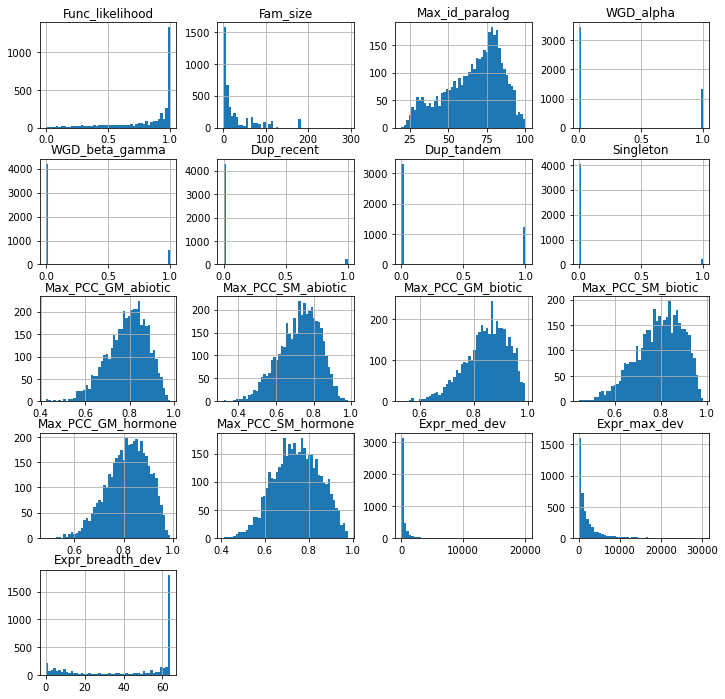

In [55]:
hist = feature_values.hist(figsize=(12,12), bins=50)

### Multivariate non-graphical EDA

In [56]:
#Determine pairwise Spearman's rank correlations of all features pairs

In [57]:
corr = feature_values.corr(method = 'spearman')

In [58]:
corr

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Func_likelihood,1.000000,-0.425232,-0.044509,0.048101,-0.031368,-0.159467,-0.365871,0.145597,0.270916,0.046910,0.133880,0.010729,0.252289,0.087491,0.809380,0.486005,0.803178
Fam_size,-0.425232,1.000000,0.126797,-0.056985,0.013941,0.115253,0.344059,-0.206112,-0.158623,0.013337,-0.052723,0.028097,-0.096479,0.003539,-0.381190,-0.105345,-0.439901
Max_id_paralog,-0.044509,0.126797,1.000000,-0.028074,-0.000748,0.090542,0.231457,-0.274425,-0.026789,-0.020144,-0.027380,-0.002215,0.031349,0.060209,-0.013421,0.076196,-0.051526
WGD_alpha,0.048101,-0.056985,-0.028074,1.000000,0.068015,0.002366,-0.033998,0.006703,0.022448,-0.004108,0.002457,-0.011307,0.011289,0.000698,0.039406,-0.011395,0.049960
WGD_beta_gamma,-0.031368,0.013941,-0.000748,0.068015,1.000000,0.014659,-0.004633,-0.024479,-0.001354,-0.004194,0.014195,0.004963,0.009639,-0.004969,-0.020867,-0.006981,-0.028465
Dup_recent,-0.159467,0.115253,0.090542,0.002366,0.014659,1.000000,0.189511,-0.045019,-0.046663,-0.021227,-0.014142,0.008451,-0.088582,-0.061154,-0.105114,-0.102642,-0.118330
Dup_tandem,-0.365871,0.344059,0.231457,-0.033998,-0.004633,0.189511,1.000000,-0.141858,-0.072686,0.054327,0.009010,0.080658,-0.058476,0.042842,-0.294494,-0.136162,-0.330194
Singleton,0.145597,-0.206112,-0.274425,0.006703,-0.024479,-0.045019,-0.141858,1.000000,0.056676,-0.014765,0.032353,-0.006439,0.006871,-0.052028,0.108895,-0.041977,0.159309
Max_PCC_GM_abiotic,0.270916,-0.158623,-0.026789,0.022448,-0.001354,-0.046663,-0.072686,0.056676,1.000000,0.702527,0.327993,0.275294,0.166645,0.054970,0.312563,0.215558,0.238961
Max_PCC_SM_abiotic,0.046910,0.013337,-0.020144,-0.004108,-0.004194,-0.021227,0.054327,-0.014765,0.702527,1.000000,0.272101,0.311541,0.076733,0.103616,0.094686,0.151211,0.025415


negative values weak relationship, positive values indicate strong relationship

### Multivariate graphical EDA

In [59]:
plt.figure(figsize=(7,6))

<Figure size 504x432 with 0 Axes>

<Figure size 504x432 with 0 Axes>

<AxesSubplot:>

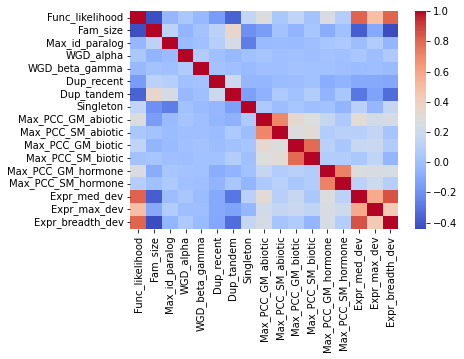

In [60]:
sns.heatmap(corr, cmap = 'coolwarm')

### Deal with unwanted instances

In [61]:
labels = ['GM','SM']

In [62]:
label_column = enzyme_gene['Label']
label_column

Gene
AT2G20690     GM
AT5G10920     GM
AT4G02580     GM
AT5G52840     GM
AT4G02620     GM
            ... 
NaN          NaN
NaN          NaN
NaN          NaN
NaN          NaN
NaN          NaN
Name: Label, Length: 5238, dtype: object

In [63]:
label_column_filter = label_column.isin(labels)

In [64]:
enzyme_gene_fil = enzyme_gene[label_column_filter]   # enzyme_gene dataframe with only GM and SM

In [65]:
enzyme_gene_fil['Label'].value_counts()  # count the occurance of unique values

GM    2212
SM     410
Name: Label, dtype: int64

In [66]:
from sklearn import preprocessing

In [67]:
le = preprocessing.LabelEncoder() #Labelencoder turn texts into 0 or 1(labels)

In [72]:
le.fit(enzyme_gene_fil.Label)

LabelEncoder()

In [73]:
enzyme_gene_fil['Label'] = le.transform(enzyme_gene_fil.Label)

C:\Users\HP\AppData\Local\Temp/ipykernel_9540/4252355681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enzyme_gene_fil['Label'] = le.transform(enzyme_gene_fil.Label)


In [74]:
enzyme_gene_fil

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,0,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,0,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,0,NaN,2.0,50.30,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,1,0.64,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.805,0.782,0.877,0.873,0.753,0.674,9.913486,214.331178,4.0
AT2G29460,1,0.96,28.0,78.12,0.0,0.0,0.0,1.0,0.0,0.917,0.924,0.929,0.904,0.888,0.924,36.188886,1076.312933,43.0
AT1G59700,1,0.95,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.810,0.781,0.905,0.849,0.904,0.894,249.963625,1529.277824,62.0


### Split train/test

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
train, test = train_test_split(
                enzyme_gene_fil,                # The data to split
                test_size=0.2,                  # Proportion data for testing
                stratify=enzyme_gene_fil.Label, # Make sure proportions of 0/1
                                                # labels are similar between
                                                # training and testing sets
                random_state=rand_seed)


In [78]:
# Print out proportions of different labels in the training data
print(train['Label'].value_counts()/train.shape[0])

0    0.843586
1    0.156414
Name: Label, dtype: float64


In [79]:
# Print out proportions of different labels in the testing data
print(test['Label'].value_counts()/test.shape[0])

0    0.84381
1    0.15619
Name: Label, dtype: float64


### Feature engineering

In [ ]:
Involves processing, transforming, selecting 

### Deal with missing data

In [80]:
enzyme_gene_fil.shape

(2622, 18)

In [81]:
row_na = enzyme_gene_fil.isnull()

In [82]:
row_na

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
AT5G10920,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT4G02580,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT5G52840,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT4G02620,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT2G29460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT1G59700,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
row_na = enzyme_gene_fil.isnull().sum()
row_na

Label                   0
Func_likelihood       702
Fam_size              361
Max_id_paralog        532
WGD_alpha             226
WGD_beta_gamma        226
Dup_recent            237
Dup_tandem            237
Singleton             370
Max_PCC_GM_abiotic    361
Max_PCC_SM_abiotic    361
Max_PCC_GM_biotic     361
Max_PCC_SM_biotic     361
Max_PCC_GM_hormone    361
Max_PCC_SM_hormone    361
Expr_med_dev          362
Expr_max_dev          362
Expr_breadth_dev      362
dtype: int64

In [84]:
row_na_num = train.isnull().sum(axis=1)
row_na_num[:5]

Gene
AT1G44575     1
AT1G16350     2
AT4G00500     1
AT4G26850     3
ATCG00670    13
dtype: int64

In [85]:
num_feat = train.shape[1] - 1

In [86]:
rows_to_keep = row_na_num/num_feat < 0.25
train_keep = train[rows_to_keep]
train_keep['Label'].value_counts()

0    1529
1     272
Name: Label, dtype: int64

In [87]:
from sklearn.impute import KNNImputer

# Create an imputer object to impute our data
# n_neighbors is the number of neighbors used to estimate the missing values.
imputer = KNNImputer(n_neighbors=5)

# Train the imputer with training data
imputer.fit(train_keep)

# Transform missing values into imputed values, hence train_keep_imp (imputed)
train_keep_imp = imputer.transform(train_keep)

# The thing with KNNImputer is it create train_keep_imp as a Numpy array so
# we don't have the column names any more. Because I really want to know what
# these columns are, so let's turn this back to a DataFrame with column names.
train_keep_imp = pd.DataFrame(train_keep_imp, columns=train.columns)
train_keep_imp.sample(4) 

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
191,0.0,0.860,7.0,73.92,0.0,0.2,0.0,1.0,0.0,0.807,0.727,0.721,0.623,0.775,0.702,16.499009,1086.333479,15.0
1493,0.0,0.902,9.0,67.19,0.0,0.0,0.0,0.0,0.0,0.811,0.795,0.939,0.880,0.813,0.754,339.788214,891.684623,64.0
624,0.0,0.900,5.0,62.55,0.0,0.0,0.0,0.0,0.0,0.673,0.562,0.767,0.662,0.758,0.636,115.919416,2832.407762,61.0
27,0.0,1.000,3.0,58.66,1.0,0.0,0.0,0.0,0.0,0.839,0.742,0.847,0.806,0.703,0.572,346.981551,926.509119,64.0


In [88]:
# count the mising values (null, NA, or called NaN: Not a Number) of each crow
row_na_num = test.isnull().sum(axis=1)
row_na_num[:5]

Gene
AT3G28180    0
AT2G12190    0
AT2G33040    0
AT4G29680    0
AT1G36160    0
dtype: int64

In [90]:
num_feat     = test.shape[1] - 1            # number of features in the data
rows_to_keep = row_na_num/num_feat < 0.25    # rows with <25% missing values
test_keep = test[rows_to_keep]             # training data with rows to keep
test_keep['Label'].value_counts()

0    367
1     63
Name: Label, dtype: int64

In [91]:
from sklearn.impute import KNNImputer

# Create an imputer object to imptue our data
# n_neighbors is the number of neighbors used to estimate the missing values.
imputer = KNNImputer(n_neighbors=5)

# test the imputer with testing data
imputer.fit(test_keep)

# Transform missing values into imputed values, hence train_keep_imp (imputed)
test_keep_imp = imputer.transform(test_keep)

# The thing with KNNImputer is it create train_keep_imp as a Numpy array so
# we don't have the column names any more. Because I really want to know what
# these columns are, so let's turn this back to a DataFrame with column names.
test_keep_imp = pd.DataFrame(test_keep_imp, columns=test.columns)
test_keep_imp.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
66,0.0,0.859,12.0,64.800,1.0,1.0,0.0,0.0,0.0,0.545,0.572,0.827,0.721,0.698,0.627,8.064657,243.134132,7.0
120,0.0,1.000,3.0,50.800,0.0,0.0,0.0,0.2,0.0,0.923,0.784,0.967,0.880,0.913,0.783,1716.570997,8031.044119,64.0
351,0.0,0.992,1.0,60.374,0.0,1.0,0.0,0.0,0.0,0.729,0.816,0.821,0.736,0.708,0.587,129.574662,225.011660,64.0
279,0.0,1.000,8.0,37.740,0.0,0.0,0.0,0.4,0.0,0.774,0.573,0.760,0.656,0.872,0.627,362.960805,1137.297661,64.0


In [92]:
train_keep_imp.head()

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
0,0.0,0.960,1.0,80.896,0.0,1.0,0.0,0.0,0.0,0.913,0.825,0.987,0.936,0.815,0.634,8672.032761,14827.084360,62.0
1,0.0,1.000,2.0,84.490,0.2,0.0,0.0,0.0,0.0,0.885,0.701,0.903,0.800,0.823,0.685,453.763209,1073.630540,63.0
2,0.0,0.878,3.0,66.250,0.0,1.0,0.0,0.0,0.0,0.744,0.741,0.800,0.722,0.663,0.502,109.881133,350.012261,63.0
3,0.0,1.000,2.0,76.850,0.0,0.0,0.0,0.2,0.0,0.834,0.823,0.761,0.694,0.841,0.710,1527.830268,5499.834040,63.0
4,1.0,0.150,17.0,97.860,0.0,0.0,1.0,1.0,0.0,0.863,0.981,0.812,0.967,0.776,0.661,53.147587,1074.500940,53.0


In [93]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# training features
X_train = train_keep_imp.iloc[:,1:]

# training labels
y_train = train_keep_imp.iloc[:,0]

# This will be used in many other occasions.
feat_names = X_train.columns

# summarize class distribution
counter = Counter(y_train)
print("Before:", counter)

# Over-sample minority, under-sample majority
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_bal, y_train = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print("After :", counter)

Before: Counter({0.0: 1529, 1.0: 272})
After : Counter({0.0: 611, 1.0: 611})


C:\Users\HP\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\HP\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\HP\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\HP\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


### Data Scaling

In [94]:
X_train_bal.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,0.763361,45.478762,67.771907,0.315293,0.129065,0.030458,0.303133,0.038326,0.786501,0.734636,0.846573,0.793839,0.816490,0.754350,364.612534,2019.980581,42.193293
std,0.264118,55.275350,15.977717,0.432143,0.310159,0.154684,0.423928,0.180278,0.086383,0.102956,0.072925,0.092397,0.080176,0.106486,895.264462,2958.079861,24.603786
min,0.020000,1.000000,23.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434000,0.324000,0.584000,0.456000,0.544000,0.421000,3.497473,6.740454,0.000000
25%,0.574290,5.000000,58.074454,0.000000,0.000000,0.000000,0.000000,0.000000,0.732796,0.670000,0.805000,0.733006,0.760072,0.682000,12.938939,299.007732,14.000000
50%,0.887045,16.000000,71.323143,0.000000,0.000000,0.000000,0.000000,0.000000,0.794919,0.748000,0.851000,0.805000,0.820043,0.753500,90.828577,974.338688,56.240138
75%,0.980000,81.836944,78.763203,0.888695,0.000000,0.000000,0.789087,0.000000,0.849311,0.808000,0.899000,0.862680,0.878000,0.835000,357.732024,2434.595553,64.000000
max,1.000000,180.000000,99.150000,1.000000,1.000000,1.000000,1.000000,1.000000,0.982000,0.982000,0.992000,0.981000,0.977000,0.971000,14340.200690,30288.301360,64.000000


In [95]:
from sklearn.preprocessing import RobustScaler

#Initialize a scaler
scaler = RobustScaler()

# fit the scaler with training features
scaler.fit(X_train_bal)

#transform the training feature values with the fitted scaler
X_train_scale = scaler.transform(X_train_bal)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_train_scale.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,1.222000e+03,1222.000000,1.222000e+03,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1.222000e+03,1222.000000,1222.000000,1222.000000,1.222000e+03,1.222000e+03,1.222000e+03,1.222000e+03,1222.000000
mean,-3.048588e-01,0.383653,-1.716506e-01,0.354782,0.129065,0.030458,0.384156,0.038326,-7.224770e-02,-0.096843,-0.047092,-0.086069,-3.012716e-02,5.555407e-03,7.940529e-01,4.896272e-01,-0.280937
std,6.510016e-01,0.719385,7.722901e-01,0.486266,0.310159,0.154684,0.537239,0.180278,7.413927e-01,0.746056,0.775798,0.712533,6.798735e-01,6.959853e-01,2.596527e+00,1.385136e+00,0.492076
min,-2.137105e+00,-0.195219,-2.331854e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-3.097633e+00,-3.072464,-2.840426,-2.691363,-2.340785e+00,-2.173203e+00,-2.532855e-01,-4.530829e-01,-1.124803
25%,-7.708826e-01,-0.143160,-6.403813e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-5.331755e-01,-0.565217,-0.489362,-0.555190,-5.085375e-01,-4.673203e-01,-2.259026e-01,-3.162272e-01,-0.844803
50%,1.368263e-16,0.000000,-3.434752e-16,0.000000,0.000000,0.000000,0.000000,0.000000,4.764526e-16,0.000000,0.000000,0.000000,4.707606e-16,-3.629909e-16,-2.060662e-17,2.661716e-17,0.000000
75%,2.291174e-01,0.856840,3.596187e-01,1.000000,0.000000,0.000000,1.000000,0.000000,4.668245e-01,0.434783,0.510638,0.444810,4.914625e-01,5.326797e-01,7.740974e-01,6.837728e-01,0.155197
max,2.784138e-01,2.134390,1.345024e+00,1.125245,1.000000,1.000000,1.267287,1.000000,1.605649e+00,1.695652,1.500000,1.357249,1.330961e+00,1.421569e+00,4.132731e+01,1.372641e+01,0.155197


In [97]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# training features
X_test = test_keep_imp.iloc[:,1:]

# training labels
y_test = test_keep_imp.iloc[:,0]

# This will be used in many other occasions.
feat_names = X_test.columns

# summarize class distribution
counter = Counter(y_test)
print("Before:", counter)

# Over-sample minority, under-sample majority
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_test_bal, y_test = pipeline.fit_resample(X_test, y_test)

# summarize the new class distribution
counter = Counter(y_test)
print("After :", counter)

Before: Counter({0.0: 367, 1.0: 63})
After : Counter({0.0: 146, 1.0: 146})


In [98]:
X_test_bal.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.704347,47.982732,67.220179,0.312835,0.140436,0.050804,0.313335,0.060801,0.775622,0.728615,0.832822,0.789356,0.810980,0.751158,273.963235,1803.239866,35.609262
std,0.294841,54.468301,16.210068,0.433526,0.327307,0.203156,0.440238,0.219302,0.084249,0.099751,0.079022,0.101016,0.081126,0.091265,769.332729,2717.265658,25.726225
min,0.036000,1.000000,26.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.552000,0.446000,0.631000,0.498000,0.486000,0.506000,3.306145,5.763663,0.000000
25%,0.482422,9.000000,58.113088,0.000000,0.000000,0.000000,0.000000,0.000000,0.712158,0.662750,0.777735,0.715000,0.765485,0.683000,9.658485,159.162693,7.000000
50%,0.799000,23.751136,71.234000,0.000000,0.000000,0.000000,0.000000,0.000000,0.772623,0.730000,0.827500,0.798500,0.822415,0.747500,29.827265,797.677466,38.740713
75%,0.967219,78.323822,79.177500,0.951844,0.000000,0.000000,1.000000,0.000000,0.839036,0.799000,0.898738,0.865250,0.870711,0.815061,250.164488,2326.334357,63.000000
max,1.000000,180.000000,99.150000,1.000000,1.000000,1.000000,1.000000,1.000000,0.960000,0.961000,0.988000,0.977000,0.947000,0.950000,8638.863459,23698.460310,64.000000


In [99]:
from sklearn.preprocessing import RobustScaler

#Initialize a scaler
scaler = RobustScaler()

# fit the scaler with training features
scaler.fit(X_test_bal)

#transform the training feature values with the fitted scaler
X_test_scale = scaler.transform(X_test_bal)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)
X_test_scale.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,292.000000,2.920000e+02,2.920000e+02,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,292.000000,292.000000,2.920000e+02
mean,-0.195242,3.495421e-01,-1.905499e-01,0.328662,0.140436,0.050804,0.313335,0.060801,0.023641,-0.010163,4.398646e-02,-6.085552e-02,-1.086666e-01,2.770170e-02,1.015093,0.463998,-5.591875e-02
std,0.608173,7.857083e-01,7.695476e-01,0.455459,0.327307,0.203156,0.440238,0.219302,0.664013,0.732116,6.530623e-01,6.723185e-01,7.709616e-01,6.910841e-01,3.198809,1.253830,4.593969e-01
min,-1.573854,-3.281864e-01,-2.140767e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.738853,-2.084404,-1.623927e+00,-2.000000e+00,-3.197054e+00,-1.828700e+00,-0.110272,-0.365414,-6.917984e-01
25%,-0.653012,-2.127860e-01,-6.228948e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-0.476558,-0.493578,-4.112681e-01,-5.557404e-01,-5.410269e-01,-4.884106e-01,-0.083860,-0.294630,-5.667984e-01
50%,0.000000,-2.558717e-17,-3.373224e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.588344e-16,3.694961e-16,-5.273559e-16,-4.206704e-16,0.000000,0.000000,-6.245005e-17
75%,0.346988,7.872140e-01,3.771052e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.523442,0.506422,5.887319e-01,4.442596e-01,4.589731e-01,5.115894e-01,0.916140,0.705370,4.332016e-01
max,0.414606,2.253899e+00,1.325268e+00,1.050593,1.000000,1.000000,1.000000,1.000000,1.476828,1.695413,1.326414e+00,1.188020e+00,1.183969e+00,1.533382e+00,35.795515,10.567129,4.510587e-01


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create a function for running RandomForest
def run_randomforest(X_train, y_train):
    # Below is a Python dictionary specify the hyperparameters to be tested
    #  2x3x4x1 = 24
    param_grid = {'n_estimators': [200, 500],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [3,5,7,9],
                  'criterion' :['entropy']}

    # Initialize a random forest classifier (rfc) with a random seed
    rfc = RandomForestClassifier(random_state=rand_seed)

    # Initialize a grid search object that will search through each of the 24
    # hyperparameter combinations. For each combination, a five fold cross-
    # validation (cv) is done. So totally 24x5 = 120 random forest classifiers
    # will be build.
    rfc_gs = GridSearchCV(
                rfc,
                param_grid,
                cv=5,              # cross validation folds
                verbose=2,         #
                scoring='roc_auc', # find model with the best ROC-AUC
                n_jobs=8)          # number of concurrent jobs, you need to
                                   # adjust this based on the number of CPU cores
                                   # available on your machine.

    # Pass the training feaure and label data to the grid search object and
    # start fitting (training) models
    rfc_gs.fit(X_train, y_train)

    # Return the fitted grid search object
    return rfc_gs

In [105]:
rfc_gs = run_randomforest(X_train_scale, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\

In [106]:
# The best model (also called estimator)
best_model = rfc_gs.best_estimator_

# Note that the best hyperparameters are also reported
best_model

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=500,
                       random_state=42)

In [107]:
print(rfc_gs.best_score_)

0.9209659305676636


In [108]:
import pickle

filename = "model_randomforest_gridsearch.save"

pickle.dump(rfc_gs.best_estimator_, open(filename, 'wb'))

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# COMMENT: What does this do?
#
param_grid = {'C': [1, 10, 1e2],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf']}

# COMMENT: What does this do?
#
svc    = SVC()

# COMMENT: What does this do?
#
svc_gs = GridSearchCV(svc, param_grid, cv=5, verbose=2, scoring='roc_auc',
                      n_jobs=8)

# COMMENT: What does this do?
#
svc_gs.fit(X_train_scale, y_train)

# COMMENT: What does this do?
#
filename = "model_svc_gridsearch.save"
pickle.dump(svc_gs.best_estimator_, open(filename, 'wb'))

# COMMENT: What does these do?
#
print(svc_gs.best_params_)
print(svc_gs.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.8984808262487356


In [110]:
##https://www.kaggle.com/datasets/urstrulyvikas/house-loan-data-analysis

In [111]:
from sklearn.inspection import permutation_importance

# Specify the best model (estimator) from our RandomForest run
rfc = rfc_gs.best_estimator_

# Calculate permutation importance of each feature
result = permutation_importance(
    rfc, X_train_scale, y_train, n_repeats=10, random_state=42, n_jobs=8)

result

{'importances_mean': array([0.04271686, 0.14770867, 0.02086743, 0.0099018 , 0.00180033,
        0.00057283, 0.08183306, 0.0002455 , 0.01153846, 0.02479542,
        0.01260229, 0.01391162, 0.01243863, 0.02397709, 0.0202946 ,
        0.02471358, 0.0205401 ]),
 'importances_std': array([0.00494803, 0.0074306 , 0.00331903, 0.00198603, 0.0007134 ,
        0.00037501, 0.0072273 , 0.00052399, 0.00118305, 0.00354914,
        0.00151778, 0.00225598, 0.00088137, 0.00097171, 0.0021589 ,
        0.00283005, 0.00238442]),
 'importances': array([[0.04418985, 0.03682488, 0.03764321, 0.04337152, 0.04337152,
         0.03682488, 0.0507365 , 0.04173486, 0.04091653, 0.05155483],
        [0.15057283, 0.15139116, 0.15057283, 0.15466448, 0.14238953,
         0.16202946, 0.14402619, 0.13666121, 0.14729951, 0.13747954],
        [0.02618658, 0.02045827, 0.01963993, 0.01554828, 0.02209493,
         0.01800327, 0.0188216 , 0.02045827, 0.02045827, 0.02700491],
        [0.01145663, 0.00818331, 0.00900164, 0.013093

In [112]:
# sort the permutation importance based on mean values
sorted_idx = result.importances_mean.argsort()[::-1]
sorted_idx

array([ 1,  6,  0,  9, 15, 13,  2, 16, 14, 11, 10, 12,  8,  3,  4,  5,  7],
      dtype=int64)

In [113]:
importance_values = result.importances[sorted_idx].T
importance_values

array([[0.15057283, 0.08919804, 0.04418985, 0.01963993, 0.02782324,
        0.02209493, 0.02618658, 0.02536825, 0.01800327, 0.01145663,
        0.01309329, 0.01391162, 0.01227496, 0.01145663, 0.00163666,
        0.00081833, 0.00163666],
       [0.15139116, 0.07446809, 0.03682488, 0.02373159, 0.02700491,
        0.02291326, 0.02045827, 0.01718494, 0.0212766 , 0.00981997,
        0.01391162, 0.01309329, 0.0106383 , 0.00818331, 0.00163666,
        0.        , 0.        ],
       [0.15057283, 0.08183306, 0.03764321, 0.02700491, 0.02536825,
        0.02373159, 0.01963993, 0.02209493, 0.01963993, 0.01391162,
        0.01145663, 0.01145663, 0.01309329, 0.00900164, 0.00245499,
        0.00081833, 0.        ],
       [0.15466448, 0.09001637, 0.04337152, 0.02209493, 0.02700491,
        0.02454992, 0.01554828, 0.02045827, 0.02373159, 0.01309329,
        0.0106383 , 0.01309329, 0.01227496, 0.01309329, 0.00327332,
        0.00081833, 0.        ],
       [0.14238953, 0.08510638, 0.04337152, 0.022094

In [114]:
ordered_feature_label = X_train_scale.columns[sorted_idx]
ordered_feature_label

Index(['Fam_size', 'Dup_tandem', 'Func_likelihood', 'Max_PCC_SM_abiotic',
       'Expr_max_dev', 'Max_PCC_SM_hormone', 'Max_id_paralog',
       'Expr_breadth_dev', 'Expr_med_dev', 'Max_PCC_SM_biotic',
       'Max_PCC_GM_biotic', 'Max_PCC_GM_hormone', 'Max_PCC_GM_abiotic',
       'WGD_alpha', 'WGD_beta_gamma', 'Dup_recent', 'Singleton'],
      dtype='object')

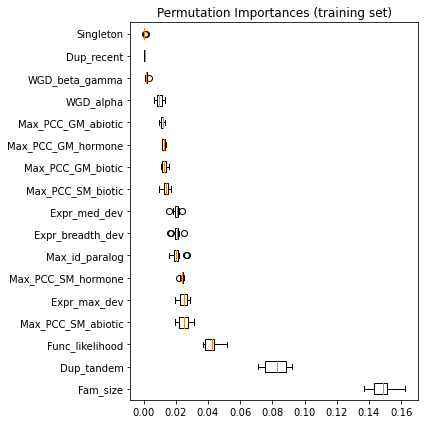

In [115]:
# Plot the permutation importance results
fig, ax = plt.subplots(figsize=(6,6))
ax.boxplot(importance_values,
           vert=False,
           labels=ordered_feature_label)
ax.set_title("Permutation Importances (training set)")
fig.tight_layout()
plt.show()

In [116]:
# Get top 10 feature names
feat_top10 = ordered_feature_label[:10]

# Get training data with only the top 10 features
X_train_top10 = X_train_scale[feat_top10]
X_train_top10.shape

(1222, 10)

In [141]:
# Get top 10 feature names
feat_top10 = ordered_feature_label[:10]

# Get training data with only the top 10 features
X_test_top10 = X_test_scale[feat_top10]
X_test_top10.shape

(292, 10)

In [117]:
rfc_gs_top10 = run_randomforest(X_train_top10, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\

In [131]:
# The best model (also called estimator)
best_model = rfc_gs_top10.best_estimator_

# Note that the best hyperparameters are also reported
best_model

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200,
                       random_state=42)

In [132]:
print(rfc_gs_top10.best_score_)

0.9217298872800604


In [121]:
# Get top 5 feature names
feat_top5 = ordered_feature_label[:5]

# Get training data with only the top 10 features
X_train_top5 = X_train_scale[feat_top5]
X_train_top5.shape

(1222, 5)

In [124]:
rfc_gs_top5 = run_randomforest(X_train_top5, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\

In [133]:
# The best model (also called estimator)
best_model = rfc_gs_top5.best_estimator_

# Note that the best hyperparameters are also reported
best_model

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200,
                       random_state=42)

In [134]:
# Get model score
rfc_gs_top5.best_score_

0.9132441012665972

In [127]:
# Get top 13 feature names
feat_top13 = ordered_feature_label[:13]

# Get training data with only the top 10 features
X_train_top13 = X_train_scale[feat_top13]
X_train_top13.shape

(1222, 13)

In [128]:
rfc_gs_top13 = run_randomforest(X_train_top13, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\

In [135]:
# The best model (also called estimator)
best_model = rfc_gs_top13.best_estimator_

# Note that the best hyperparameters are also reported
best_model

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=500,
                       random_state=42)

In [136]:
print(rfc_gs_top13.best_score_)

0.9201513929947147


In [138]:
# Save model
filename = "model_randomforest_gridsearch_top10feat.save"

pickle.dump(rfc_gs_top10.best_estimator_, open(filename, 'wb'))

In [139]:
# Get model score
rfc_gs_top10.best_score_

0.9217298872800604

In [142]:
filename2 = "model_randomforest_gridsearch_top10feat.save"

# load model from file
rfc_loaded_top10 = pickle.load(open(filename2, 'rb')) # model using top 10

# predict testing data labels with the model using top 10 features
y_test_pred = rfc_loaded_top10.predict(X_test_top10)
y_test_pred

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1.

In [143]:
print(y_test_pred[:40])

[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [145]:
print(np.array(y_test[:40]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [146]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Get confusion matrrix
cm_top10 = confusion_matrix(y_test, y_test_pred)
cm_top10

array([[116,  30],
       [ 51,  95]], dtype=int64)

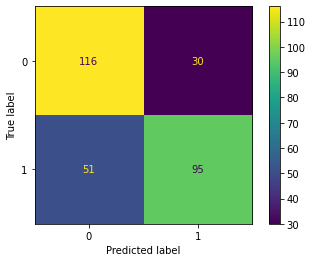

In [147]:
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(cm_top10).plot()

In [148]:
from sklearn.metrics import classification_report

# Set class names
targets = ["GM", "SM"]

report = classification_report(y_test, y_test_pred, target_names=targets)
print(report)

              precision    recall  f1-score   support

          GM       0.69      0.79      0.74       146
          SM       0.76      0.65      0.70       146

    accuracy                           0.72       292
   macro avg       0.73      0.72      0.72       292
weighted avg       0.73      0.72      0.72       292

